## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Import Datasets

In [2]:
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')
sub = pd.read_csv('sample_submission_O1oDc4H.csv')

## Data Preprocessing

In [3]:
train.shape, test.shape, sub.shape

((88858, 10), (59310, 9), (59310, 2))

In [4]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
sub.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


## Exploratory Data Analysis

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [8]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [9]:
# 0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides

view = train.groupby('Crop_Damage')
view.count()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Crop_Damage,,,,,,,,,
0,74238,74238,74238,74238,74238,74238,66743,74238,74238
1,12307,12307,12307,12307,12307,12307,11059,12307,12307
2,2313,2313,2313,2313,2313,2313,2056,2313,2313


In [10]:
new_view = view.count()

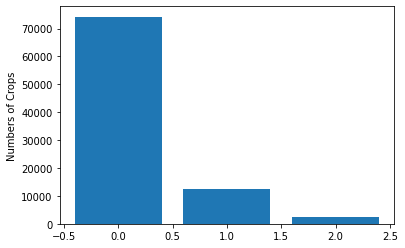

In [11]:
#how many crops were in each category ?

plt.bar(new_view.index.values, new_view['ID'])
plt.ylabel("Numbers of Crops")
plt.show()

In [12]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [13]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [14]:
# train['Number_Weeks_Used'].value_counts()

In [15]:
#Fill with mean
train_mean_df = round(train['Number_Weeks_Used'].mean())
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train_mean_df)

test_mean_df = round(test['Number_Weeks_Used'].mean())
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test_mean_df)

In [16]:
train_n = pd.get_dummies(train['Crop_Type'], prefix='Crop_Type')
train = pd.concat([train, train_n], axis=1)

test_n = pd.get_dummies(test['Crop_Type'], prefix='Crop_Type')
test = pd.concat([test, test_n], axis=1)

In [17]:
train_m = pd.get_dummies(train['Season'], prefix='Season')
train = pd.concat([train, train_m], axis=1)

test_m = pd.get_dummies(test['Season'], prefix='Season')
test = pd.concat([test, test_m], axis=1)

In [18]:
train_o = pd.get_dummies(train['Pesticide_Use_Category'], prefix='Pesticide_Use_Category')
train = pd.concat([train, train_o], axis=1)

test_o = pd.get_dummies(test['Pesticide_Use_Category'], prefix='Pesticide_Use_Category')
test = pd.concat([test, test_o], axis=1)

In [19]:
train_p = pd.get_dummies(train['Soil_Type'], prefix='Soil_Type')
train = pd.concat([train, train_p], axis=1)

test_p = pd.get_dummies(test['Soil_Type'], prefix='Soil_Type')
test = pd.concat([test, test_p], axis=1)

In [ ]:
# train.dropna(inplace=True)
# train.isna().sum()

In [21]:
train['Total_Dose_Used'] = train['Number_Doses_Week'] * train['Number_Weeks_Used']
train['Number_Months_Used'] = train['Number_Weeks_Used'] / 4
train['Total_Week_used'] = train['Number_Weeks_Used'] + train['Number_Weeks_Quit']

test['Total_Dose_Used'] = test['Number_Doses_Week'] * test['Number_Weeks_Used']
test['Number_Months_Used'] = test['Number_Weeks_Used'] / 4
test['Total_Week_used'] = test['Number_Weeks_Used'] + test['Number_Weeks_Quit']

In [23]:
train.columns, test.columns

(Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'Crop_Type_0',
        'Crop_Type_1', 'Season_1', 'Season_2', 'Season_3',
        'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
        'Pesticide_Use_Category_3', 'Soil_Type_0', 'Soil_Type_1',
        'Total_Dose_Used', 'Number_Months_Used', 'Total_Week_used'],
       dtype='object'),
 Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
        'Number_Weeks_Quit', 'Season', 'Crop_Type_0', 'Crop_Type_1', 'Season_1',
        'Season_2', 'Season_3', 'Pesticide_Use_Category_1',
        'Pesticide_Use_Category_2', 'Pesticide_Use_Category_3', 'Soil_Type_0',
        'Soil_Type_1', 'Total_Dose_Used', 'Number_Months_Used',
        'Total_Week_used'],
       dtype='object'))

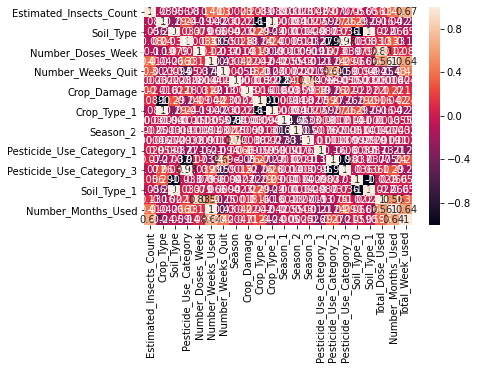

In [24]:
sns.heatmap(train.corr(), annot=True)

In [25]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Crop_Type_0,Crop_Type_1,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Total_Dose_Used,Number_Months_Used,Total_Week_used
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412825,0.299279,0.002304,0.202888,0.088830,-0.088830,-0.003120,0.002503,0.000455,0.028904,0.069512,-0.076502,0.056375,-0.056375,0.125849,0.412825,0.667505
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041643,-0.233394,0.002161,-0.016495,-1.000000,1.000000,-0.000937,-0.001308,0.002713,0.058619,-0.266833,0.256921,0.287372,-0.287372,-0.158458,-0.041643,-0.239217
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066480,0.009364,0.002327,-0.021997,0.287372,-0.287372,-0.000999,-0.001428,0.002934,0.008723,-0.037217,0.035716,-1.000000,1.000000,0.022019,-0.066480,-0.058806
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326178,-0.554169,0.002811,0.175002,-0.235779,0.235779,-0.001545,-0.001104,0.003156,-0.266966,-0.910593,0.977956,-0.032657,0.032657,0.127053,0.326178,-0.141365
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119775,-0.037131,-0.001401,-0.030874,0.192161,-0.192161,0.001346,-0.000508,-0.000911,-0.162061,0.073089,-0.038738,-0.079447,0.079447,0.832043,0.119775,0.088811
Number_Weeks_Used,0.412825,-0.041643,-0.066480,0.326178,0.119775,1.000000,-0.425745,0.004209,0.219648,0.041643,-0.041643,-0.005541,0.004279,0.001016,-0.210013,-0.244293,0.292351,0.066480,-0.066480,0.559326,1.000000,0.643584
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425745,1.000000,0.000595,-0.133117,0.233394,-0.233394,0.000720,-0.002158,0.001871,-0.094455,0.608580,-0.594474,-0.009364,0.009364,-0.247733,-0.425745,0.418543
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004209,0.000595,1.000000,-0.000184,-0.002161,0.002161,-0.842768,0.146202,0.785697,-0.006604,-0.000049,0.001480,-0.002327,0.002327,-0.000177,0.004209,0.004728
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219648,-0.133117,-0.000184,1.000000,0.016495,-0.016495,-0.003048,0.005859,-0.003825,0.185833,-0.259090,0.221533,0.021997,-0.021997,0.102365,0.219648,0.107863
Crop_Type_0,0.088830,-1.000000,0.287372,-0.235779,0.192161,0.041643,0.233394,-0.002161,0.016495,1.000000,-1.000000,0.000937,0.001308,-0.002713,-0.058619,0.266833,-0.256921,-0.287372,0.287372,0.158458,0.041643,0.239217


In [ ]:
# train.dropna(inplace=True)
# train.isna().sum()

In [27]:
train.shape, test.shape

((88858, 23), (59310, 22))

In [28]:
corr_train = train.corr()

In [29]:
pd.options.display.max_rows = 999
corr_train['Crop_Damage'].sort_values(ascending=False)

Crop_Damage                 1.000000
Pesticide_Use_Category_3    0.221533
Number_Weeks_Used           0.219648
Number_Months_Used          0.219648
Estimated_Insects_Count     0.202888
Pesticide_Use_Category_1    0.185833
Pesticide_Use_Category      0.175002
Total_Week_used             0.107863
Total_Dose_Used             0.102365
Soil_Type_0                 0.021997
Crop_Type_0                 0.016495
Season_2                    0.005859
Season                     -0.000184
Season_1                   -0.003048
Season_3                   -0.003825
Crop_Type                  -0.016495
Crop_Type_1                -0.016495
Soil_Type_1                -0.021997
Soil_Type                  -0.021997
Number_Doses_Week          -0.030874
Number_Weeks_Quit          -0.133117
Pesticide_Use_Category_2   -0.259090
Name: Crop_Damage, dtype: float64

In [30]:
# split data into features and target

x = train[['Pesticide_Use_Category_3', 'Number_Weeks_Used', 
'Number_Months_Used', 'Estimated_Insects_Count', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category',
'Total_Week_used', 'Total_Dose_Used', 'Soil_Type_0', 'Crop_Type_0', 'Season_2']]
y=train['Crop_Damage']

test_data = test[['Pesticide_Use_Category_3', 'Number_Weeks_Used', 
'Number_Months_Used', 'Estimated_Insects_Count', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category',
'Total_Week_used', 'Total_Dose_Used', 'Soil_Type_0', 'Crop_Type_0', 'Season_2']]

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(62200, 11)
(26658, 11)
(62200,)
(26658,)


## Naive Bayes

In [32]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [34]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8199414809813189
Precision:  0.7768807760951248
Recall:  0.8199414809813189


In [35]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22256
           1       0.36      0.19      0.25      3697
           2       0.17      0.08      0.10       705

    accuracy                           0.82     26658
   macro avg       0.47      0.41      0.42     26658
weighted avg       0.78      0.82      0.79     26658



In [36]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

### Random Forest

In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.8151774326656164
Precision:  0.7764468115122815
Recall:  0.8151774326656164


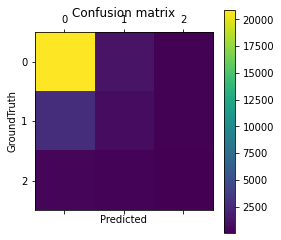

[[20913  1177   166]
 [ 2772   771   154]
 [  443   215    47]]


In [39]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))
conftable(y_test,y_pred,"conf")

# LGB

In [40]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier()
lgb = lightgbm.fit( x_train, y_train)
y_pred = lgb.predict(x_test)

In [41]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8435741616025209
Precision:  0.7882272599739377
Recall:  0.8435741616025209


In [42]:
test_ypred = lgb.predict(test_data)

In [44]:
test_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# CatBoost

In [45]:
import catboost as ctb
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
ctb = catboost.fit( x_train, y_train)
y_pred = ctb.predict(x_test)

Learning rate set to 0.09768
0:	learn: 0.9827725	total: 108ms	remaining: 1m 48s
1:	learn: 0.8941556	total: 142ms	remaining: 1m 10s
2:	learn: 0.8246428	total: 172ms	remaining: 57.3s
3:	learn: 0.7671418	total: 198ms	remaining: 49.2s
4:	learn: 0.7202733	total: 223ms	remaining: 44.4s
5:	learn: 0.6810743	total: 248ms	remaining: 41s
6:	learn: 0.6485107	total: 269ms	remaining: 38.2s
7:	learn: 0.6213972	total: 291ms	remaining: 36s
8:	learn: 0.5975299	total: 313ms	remaining: 34.5s
9:	learn: 0.5765029	total: 337ms	remaining: 33.4s
10:	learn: 0.5586312	total: 361ms	remaining: 32.4s
11:	learn: 0.5428490	total: 383ms	remaining: 31.5s
12:	learn: 0.5294815	total: 406ms	remaining: 30.8s
13:	learn: 0.5174948	total: 435ms	remaining: 30.6s
14:	learn: 0.5073774	total: 460ms	remaining: 30.2s
15:	learn: 0.4989504	total: 482ms	remaining: 29.6s
16:	learn: 0.4908928	total: 504ms	remaining: 29.1s
17:	learn: 0.4841446	total: 526ms	remaining: 28.7s
18:	learn: 0.4780127	total: 548ms	remaining: 28.3s
19:	learn: 0.4

161:	learn: 0.4160675	total: 4.25s	remaining: 22s
162:	learn: 0.4160282	total: 4.28s	remaining: 22s
163:	learn: 0.4159637	total: 4.31s	remaining: 22s
164:	learn: 0.4159115	total: 4.33s	remaining: 21.9s
165:	learn: 0.4158627	total: 4.36s	remaining: 21.9s
166:	learn: 0.4158211	total: 4.39s	remaining: 21.9s
167:	learn: 0.4157792	total: 4.41s	remaining: 21.9s
168:	learn: 0.4157097	total: 4.44s	remaining: 21.9s
169:	learn: 0.4156520	total: 4.47s	remaining: 21.8s
170:	learn: 0.4156257	total: 4.5s	remaining: 21.8s
171:	learn: 0.4155571	total: 4.53s	remaining: 21.8s
172:	learn: 0.4154618	total: 4.55s	remaining: 21.8s
173:	learn: 0.4154398	total: 4.58s	remaining: 21.7s
174:	learn: 0.4153201	total: 4.61s	remaining: 21.7s
175:	learn: 0.4152839	total: 4.63s	remaining: 21.7s
176:	learn: 0.4152433	total: 4.66s	remaining: 21.7s
177:	learn: 0.4152064	total: 4.69s	remaining: 21.7s
178:	learn: 0.4151635	total: 4.72s	remaining: 21.7s
179:	learn: 0.4151094	total: 4.75s	remaining: 21.6s
180:	learn: 0.41507

321:	learn: 0.4072877	total: 8.32s	remaining: 17.5s
322:	learn: 0.4072348	total: 8.35s	remaining: 17.5s
323:	learn: 0.4072167	total: 8.37s	remaining: 17.5s
324:	learn: 0.4071882	total: 8.4s	remaining: 17.4s
325:	learn: 0.4071351	total: 8.42s	remaining: 17.4s
326:	learn: 0.4070233	total: 8.45s	remaining: 17.4s
327:	learn: 0.4070021	total: 8.47s	remaining: 17.4s
328:	learn: 0.4069365	total: 8.5s	remaining: 17.3s
329:	learn: 0.4068993	total: 8.52s	remaining: 17.3s
330:	learn: 0.4068544	total: 8.55s	remaining: 17.3s
331:	learn: 0.4068109	total: 8.57s	remaining: 17.3s
332:	learn: 0.4067866	total: 8.6s	remaining: 17.2s
333:	learn: 0.4067128	total: 8.62s	remaining: 17.2s
334:	learn: 0.4066566	total: 8.65s	remaining: 17.2s
335:	learn: 0.4066014	total: 8.67s	remaining: 17.1s
336:	learn: 0.4065391	total: 8.69s	remaining: 17.1s
337:	learn: 0.4064743	total: 8.71s	remaining: 17.1s
338:	learn: 0.4064351	total: 8.74s	remaining: 17s
339:	learn: 0.4064154	total: 8.76s	remaining: 17s
340:	learn: 0.40633

480:	learn: 0.4003578	total: 12s	remaining: 13s
481:	learn: 0.4003169	total: 12s	remaining: 12.9s
482:	learn: 0.4002999	total: 12.1s	remaining: 12.9s
483:	learn: 0.4001960	total: 12.1s	remaining: 12.9s
484:	learn: 0.4001459	total: 12.1s	remaining: 12.9s
485:	learn: 0.4001242	total: 12.1s	remaining: 12.8s
486:	learn: 0.4000963	total: 12.2s	remaining: 12.8s
487:	learn: 0.4000232	total: 12.2s	remaining: 12.8s
488:	learn: 0.4000035	total: 12.2s	remaining: 12.7s
489:	learn: 0.3999729	total: 12.2s	remaining: 12.7s
490:	learn: 0.3999227	total: 12.2s	remaining: 12.7s
491:	learn: 0.3998489	total: 12.3s	remaining: 12.7s
492:	learn: 0.3997870	total: 12.3s	remaining: 12.6s
493:	learn: 0.3997496	total: 12.3s	remaining: 12.6s
494:	learn: 0.3996892	total: 12.3s	remaining: 12.6s
495:	learn: 0.3996477	total: 12.4s	remaining: 12.6s
496:	learn: 0.3996074	total: 12.4s	remaining: 12.5s
497:	learn: 0.3995825	total: 12.4s	remaining: 12.5s
498:	learn: 0.3995578	total: 12.4s	remaining: 12.5s
499:	learn: 0.3995

645:	learn: 0.3944635	total: 16s	remaining: 8.78s
646:	learn: 0.3944291	total: 16.1s	remaining: 8.76s
647:	learn: 0.3943870	total: 16.1s	remaining: 8.73s
648:	learn: 0.3943449	total: 16.1s	remaining: 8.71s
649:	learn: 0.3943098	total: 16.1s	remaining: 8.68s
650:	learn: 0.3942844	total: 16.1s	remaining: 8.66s
651:	learn: 0.3942557	total: 16.2s	remaining: 8.63s
652:	learn: 0.3942142	total: 16.2s	remaining: 8.6s
653:	learn: 0.3941844	total: 16.2s	remaining: 8.58s
654:	learn: 0.3941631	total: 16.2s	remaining: 8.55s
655:	learn: 0.3940915	total: 16.3s	remaining: 8.53s
656:	learn: 0.3940743	total: 16.3s	remaining: 8.5s
657:	learn: 0.3940121	total: 16.3s	remaining: 8.48s
658:	learn: 0.3939791	total: 16.3s	remaining: 8.45s
659:	learn: 0.3939340	total: 16.4s	remaining: 8.42s
660:	learn: 0.3939135	total: 16.4s	remaining: 8.4s
661:	learn: 0.3938829	total: 16.4s	remaining: 8.37s
662:	learn: 0.3938444	total: 16.4s	remaining: 8.34s
663:	learn: 0.3938305	total: 16.4s	remaining: 8.32s
664:	learn: 0.393

808:	learn: 0.3893516	total: 19.8s	remaining: 4.67s
809:	learn: 0.3893054	total: 19.8s	remaining: 4.64s
810:	learn: 0.3892650	total: 19.8s	remaining: 4.62s
811:	learn: 0.3892331	total: 19.8s	remaining: 4.59s
812:	learn: 0.3892238	total: 19.9s	remaining: 4.57s
813:	learn: 0.3891959	total: 19.9s	remaining: 4.54s
814:	learn: 0.3891353	total: 19.9s	remaining: 4.52s
815:	learn: 0.3891179	total: 19.9s	remaining: 4.5s
816:	learn: 0.3890622	total: 20s	remaining: 4.47s
817:	learn: 0.3890189	total: 20s	remaining: 4.45s
818:	learn: 0.3889974	total: 20s	remaining: 4.42s
819:	learn: 0.3889706	total: 20s	remaining: 4.4s
820:	learn: 0.3889258	total: 20.1s	remaining: 4.38s
821:	learn: 0.3888892	total: 20.1s	remaining: 4.35s
822:	learn: 0.3888761	total: 20.1s	remaining: 4.33s
823:	learn: 0.3888537	total: 20.1s	remaining: 4.3s
824:	learn: 0.3888180	total: 20.2s	remaining: 4.28s
825:	learn: 0.3887676	total: 20.2s	remaining: 4.25s
826:	learn: 0.3886945	total: 20.2s	remaining: 4.23s
827:	learn: 0.3886773	t

967:	learn: 0.3846645	total: 24s	remaining: 792ms
968:	learn: 0.3846259	total: 24s	remaining: 768ms
969:	learn: 0.3846131	total: 24s	remaining: 743ms
970:	learn: 0.3845947	total: 24.1s	remaining: 718ms
971:	learn: 0.3845763	total: 24.1s	remaining: 694ms
972:	learn: 0.3845609	total: 24.1s	remaining: 669ms
973:	learn: 0.3845336	total: 24.1s	remaining: 644ms
974:	learn: 0.3845139	total: 24.2s	remaining: 619ms
975:	learn: 0.3844863	total: 24.2s	remaining: 595ms
976:	learn: 0.3844658	total: 24.2s	remaining: 570ms
977:	learn: 0.3844373	total: 24.2s	remaining: 545ms
978:	learn: 0.3844077	total: 24.3s	remaining: 520ms
979:	learn: 0.3843875	total: 24.3s	remaining: 496ms
980:	learn: 0.3843539	total: 24.3s	remaining: 471ms
981:	learn: 0.3843267	total: 24.3s	remaining: 446ms
982:	learn: 0.3843025	total: 24.4s	remaining: 421ms
983:	learn: 0.3842646	total: 24.4s	remaining: 396ms
984:	learn: 0.3842431	total: 24.4s	remaining: 372ms
985:	learn: 0.3842198	total: 24.4s	remaining: 347ms
986:	learn: 0.3842

In [46]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8443619176232275
Precision:  0.7949483868671546
Recall:  0.8443619176232275


In [55]:
cat_test_ypred = ctb.predict(test_data)

In [65]:
cat_test_ypred.flatten()

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Logistic Regression

In [48]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [50]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8370095280966314
Precision:  0.7735980204343541
Recall:  0.8370095280966314


In [51]:
log_ypred = classifier.predict(test_data)

In [52]:
log_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
# Fitting KNeighborsClassifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
# Predicting the Test set results
knc_y_pred = knc.predict(x_test)

In [64]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.8370095280966314
Precision:  0.7735980204343541
Recall:  0.8370095280966314


In [53]:
submission_df = pd.DataFrame({'ID': sub['ID'], 'Crop_Damage': test_ypred}) # Creating a submission file
submission_df.to_csv('lgb.csv', index = False)

In [61]:
submission_df = pd.DataFrame({'ID': sub['ID'], 'Crop_Damage': log_ypred}) # Creating a submission file
submission_df.to_csv('logpred.csv', index = False)